# Подключение библиотек

In [59]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [63]:
pip freeze

aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/b/abs_45ba4vacaj/croot/alabaster_1718201502252/work
altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anaconda-anon-usage @ file:///C:/b/abs_c3w_h1zzjg/croot/anaconda-anon-usage_1710965204622/work
anaconda-catalogs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/anaconda-catalogs_1701816586117/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_b02evi84gh/croot/anaconda-cloud-auth_1713991445770/work
anaconda-navigator @ file:///C:/b/abs_d8d4a02c3t/croot/anaconda-navigator_1713464063970/work
anaconda-project @ file:///C:/b/abs_95s0l9dwvd/

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Подключение дата сета

In [65]:
df = pd.read_csv("films250.csv")

In [66]:
df.head(10)

Название  Год выпуска Длительность  \
0                    Побег из Шоушенка         1994       2h 22m   
1                        Крёстный отец         1972       2h 55m   
2                        Тёмный рыцарь         2008       2h 32m   
3                      Крёстный отец 2         1974       3h 22m   
4               12 рaзгневанных мужчин         1957       1h 36m   
5  Властелин колец: Возвращение короля         2003       3h 21m   
6                      Список Шиндлера         1993       3h 15m   
7                   Криминальное чтиво         1994       2h 34m   
8     Властелин колец: Братство кольца         2001       2h 58m   
9                Хороший, плохой, злой         1966       2h 41m   

                                    Описание_перевод  Рейтинг  \
0  Банкир, осужденный за уксорицид, образует друж...      9.3   
1  Старение патриарха организованной криминальной...      9.2   
2  Когда угроза, известная как Джокер, наносит ущ...      9.0   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4  Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
5  Гандальф и Арагорн ведут мир людей против арми...      9.0   
6  В оккупированной немецкой Поль году во время В...      9.0   
7  Жизнь двух наемников толпы, боксера, гангстера...      8.9   
8  Крутый хоббит из Шира и восемь компаньонов отп...      8.9   
9  Мошенничество на щедрости присоединяется к дву...      8.8   

                                       Страна                       Жанр  
0                               United States                      Drama  
1                               United States               Crime, Drama  
2               United States, United Kingdom       Action, Crime, Drama  
3                               United States               Crime, Drama  
4                               United States               Crime, Drama  
5                  New Zealand, United States  Adventure, Drama, Fantasy  
6                               United States  Biography, Drama, History  
7                               United States               Crime, Drama  
8  New Zealand, United States, United Kingdom  Adventure, Drama, Fantasy  
9   Italy, Spain, West Germany, United States         Adventure, Western

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Название          250 non-null    object 
 1   Год выпуска       250 non-null    int64  
 2   Длительность      250 non-null    object 
 3   Описание_перевод  250 non-null    object 
 4   Рейтинг           250 non-null    float64
 5   Страна            250 non-null    object 
 6   Жанр              250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [68]:
df.Описание_перевод[8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

### Обработка 

In [69]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [70]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [71]:
df['Обработанный текст']= [remove_othersymbol(text.lower()) for text in df.Описание_перевод]

In [72]:
df.head(9)

Название  Год выпуска Длительность  \
0                    Побег из Шоушенка         1994       2h 22m   
1                        Крёстный отец         1972       2h 55m   
2                        Тёмный рыцарь         2008       2h 32m   
3                      Крёстный отец 2         1974       3h 22m   
4               12 рaзгневанных мужчин         1957       1h 36m   
5  Властелин колец: Возвращение короля         2003       3h 21m   
6                      Список Шиндлера         1993       3h 15m   
7                   Криминальное чтиво         1994       2h 34m   
8     Властелин колец: Братство кольца         2001       2h 58m   

                                    Описание_перевод  Рейтинг  \
0  Банкир, осужденный за уксорицид, образует друж...      9.3   
1  Старение патриарха организованной криминальной...      9.2   
2  Когда угроза, известная как Джокер, наносит ущ...      9.0   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4  Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
5  Гандальф и Арагорн ведут мир людей против арми...      9.0   
6  В оккупированной немецкой Поль году во время В...      9.0   
7  Жизнь двух наемников толпы, боксера, гангстера...      8.9   
8  Крутый хоббит из Шира и восемь компаньонов отп...      8.9   

                                       Страна                       Жанр  \
0                               United States                      Drama   
1                               United States               Crime, Drama   
2               United States, United Kingdom       Action, Crime, Drama   
3                               United States               Crime, Drama   
4                               United States               Crime, Drama   
5                  New Zealand, United States  Adventure, Drama, Fantasy   
6                               United States  Biography, Drama, History   
7                               United States               Crime, Drama   
8  New Zealand, United States, United Kingdom  Adventure, Drama, Fantasy   

                                  Обработанный текст  
0  банкир, осужденный за уксорицид, образует друж...  
1  старение патриарха организованной криминальной...  
2  когда угроза, известная как джокер, наносит ущ...  
3  ранняя жизнь и карьера вито корлеоне в 1920 -х...  
4  присяжные в суде по делу об убийстве в нью -йо...  
5  гандальф и арагорн ведут мир людей против арми...  
6  в оккупированной немецкой поль году во время в...  
7  жизнь двух наемников толпы, боксера, гангстера...  
8  крутый хоббит из шира и восемь компаньонов отп...

In [73]:
df["Описание_перевод"][8]

'Крутый хоббит из Шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти Средиземье от Темного лорда Саурона.'

In [74]:
df["Обработанный текст"][8]

'крутый хоббит из шира и восемь компаньонов отправился в путешествие, чтобы уничтожить мощное кольцо и спасти средиземье от темного лорда саурона.'

In [75]:
russian_stopwords = stopwords.words("russian") 

In [76]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','которые','которых','свой','своём','всем','всё','её','оба','ещё','должный','должные','должных']) 

In [77]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [78]:
df['Токенизированный текст'] = [tokenize(text) for text in df['Обработанный текст']]

In [79]:
df

Название  Год выпуска Длительность  \
0         Побег из Шоушенка         1994       2h 22m   
1             Крёстный отец         1972       2h 55m   
2             Тёмный рыцарь         2008       2h 32m   
3           Крёстный отец 2         1974       3h 22m   
4    12 рaзгневанных мужчин         1957       1h 36m   
..                      ...          ...          ...   
245            Форма голоса         2016       2h 10m   
246                Прислуга         2011       2h 26m   
247             Сука любовь         2000       2h 34m   
248                 Ребекка         1940       2h 10m   
249               Видимость         2015       2h 43m   

                                      Описание_перевод  Рейтинг  \
0    Банкир, осужденный за уксорицид, образует друж...      9.3   
1    Старение патриарха организованной криминальной...      9.2   
2    Когда угроза, известная как Джокер, наносит ущ...      9.0   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4    Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
..                                                 ...      ...   
245  Глухая девушка, Шоко, издевается популярной Ша...      8.1   
246  Начинающий автор во время движения за гражданс...      8.1   
247  Любительский боец ​​собаки, супермодель и забр...      8.0   
248  Самосознательная женщина жонглирует приспособл...      8.1   
249  Отчаянные меры принимаются человеком, который ...      8.2   

                            Страна                     Жанр  \
0                    United States                    Drama   
1                    United States             Crime, Drama   
2    United States, United Kingdom     Action, Crime, Drama   
3                    United States             Crime, Drama   
4                    United States             Crime, Drama   
..                             ...                      ...   
245                          Japan         Animation, Drama   
246           United States, India                    Drama   
247                         Mexico          Drama, Thriller   
248                  United States  Drama, Mystery, Romance   
249                          India    Crime, Drama, Mystery   

                                    Обработанный текст  \
0    банкир, осужденный за уксорицид, образует друж...   
1    старение патриарха организованной криминальной...   
2    когда угроза, известная как джокер, наносит ущ...   
3    ранняя жизнь и карьера вито корлеоне в 1920 -х...   
4    присяжные в суде по делу об убийстве в нью -йо...   
..                                                 ...   
245  глухая девушка, шоко, издевается популярной ша...   
246  начинающий автор во время движения за гражданс...   
247  любительский боец ​​собаки, супермодель и забр...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком, который ...   

                                Токенизированный текст  
0    банкир , осужденный уксорицид , образует дружб...  
1    старение патриарха организованной криминальной...  
2    угроза , известная джокер , наносит ущерб хаос...  
3    ранняя жизнь карьера вито корлеоне 1920 -х год...  
4    присяжные суде делу убийстве нью -йорке разоча...  
..                                                 ...  
245  глухая девушка , шоко , издевается популярной ...  
246  начинающий автор время движения гражданские пр...  
247  любительский боец ​​собаки , супермодель забро...  
248  самосознательная женщина жонглирует приспособл...  
249  отчаянные меры принимаются человеком , пытаетс...  

[250 rows x 9 columns]

In [80]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [81]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [82]:
%%time
lemm_texts_list = []
for text in (df['Токенизированный текст']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['Лематизированный текст'] = lemm_texts_list

CPU times: total: 3.72 s
Wall time: 3.93 s


In [83]:
df.head(9)

Название  Год выпуска Длительность  \
0                    Побег из Шоушенка         1994       2h 22m   
1                        Крёстный отец         1972       2h 55m   
2                        Тёмный рыцарь         2008       2h 32m   
3                      Крёстный отец 2         1974       3h 22m   
4               12 рaзгневанных мужчин         1957       1h 36m   
5  Властелин колец: Возвращение короля         2003       3h 21m   
6                      Список Шиндлера         1993       3h 15m   
7                   Криминальное чтиво         1994       2h 34m   
8     Властелин колец: Братство кольца         2001       2h 58m   

                                    Описание_перевод  Рейтинг  \
0  Банкир, осужденный за уксорицид, образует друж...      9.3   
1  Старение патриарха организованной криминальной...      9.2   
2  Когда угроза, известная как Джокер, наносит ущ...      9.0   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4  Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
5  Гандальф и Арагорн ведут мир людей против арми...      9.0   
6  В оккупированной немецкой Поль году во время В...      9.0   
7  Жизнь двух наемников толпы, боксера, гангстера...      8.9   
8  Крутый хоббит из Шира и восемь компаньонов отп...      8.9   

                                       Страна                       Жанр  \
0                               United States                      Drama   
1                               United States               Crime, Drama   
2               United States, United Kingdom       Action, Crime, Drama   
3                               United States               Crime, Drama   
4                               United States               Crime, Drama   
5                  New Zealand, United States  Adventure, Drama, Fantasy   
6                               United States  Biography, Drama, History   
7                               United States               Crime, Drama   
8  New Zealand, United States, United Kingdom  Adventure, Drama, Fantasy   

                                  Обработанный текст  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в 1920 -х...   
4  присяжные в суде по делу об убийстве в нью -йо...   
5  гандальф и арагорн ведут мир людей против арми...   
6  в оккупированной немецкой поль году во время в...   
7  жизнь двух наемников толпы, боксера, гангстера...   
8  крутый хоббит из шира и восемь компаньонов отп...   

                              Токенизированный текст  \
0  банкир , осужденный уксорицид , образует дружб...   
1  старение патриарха организованной криминальной...   
2  угроза , известная джокер , наносит ущерб хаос...   
3  ранняя жизнь карьера вито корлеоне 1920 -х год...   
4  присяжные суде делу убийстве нью -йорке разоча...   
5  гандальф арагорн ведут мир людей против армии ...   
6  оккупированной немецкой поль году время второй...   
7  жизнь двух наемников толпы , боксера , гангсте...   
8  крутый хоббит шира восемь компаньонов отправил...   

                              Лематизированный текст  
0  банкир , осудить уксорицид , образовать дружба...  
1  старение патриарх организовать криминальный ди...  
2  угроза , известный джокер , наносить ущерб хао...  
3  ранний жизнь карьера вить корлеон 1920 -х год ...  
4  присяжный суд дело убийство нью -йорк разочаро...  
5  гандальф арагорн вести мир человек против арми...  
6  оккупировать немецкий поль год время второй ми...  
7  жизнь два наёмник толпа , боксёр , гангстер же...  
8  круть хоббит шир восемь компаньон отправиться ...

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

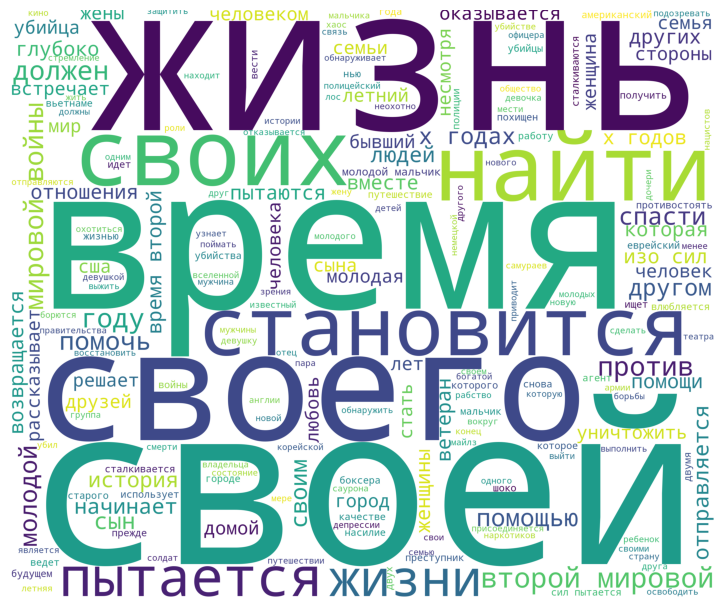

In [86]:
corpus = get_corpus(df['Токенизированный текст'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [87]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

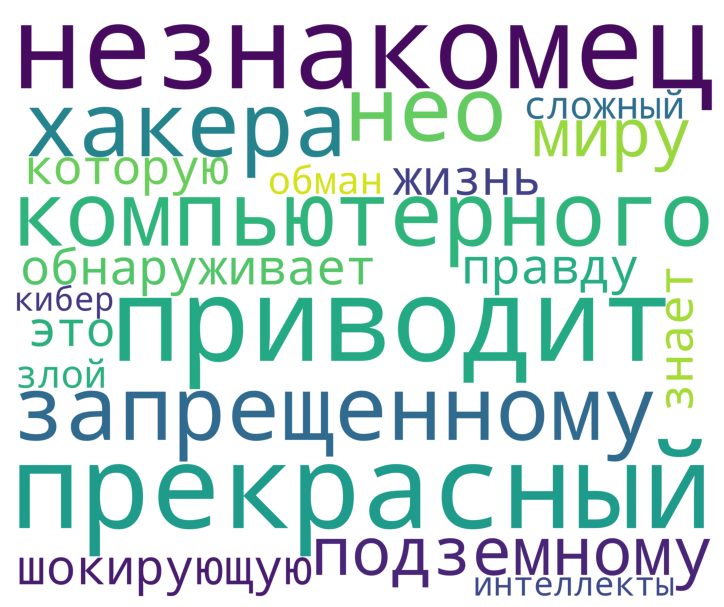

In [88]:
corpus = df['Токенизированный текст'][15]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

In [89]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text

In [90]:
df.head(5)

Название  Год выпуска Длительность  \
0       Побег из Шоушенка         1994       2h 22m   
1           Крёстный отец         1972       2h 55m   
2           Тёмный рыцарь         2008       2h 32m   
3         Крёстный отец 2         1974       3h 22m   
4  12 рaзгневанных мужчин         1957       1h 36m   

                                    Описание_перевод  Рейтинг  \
0  Банкир, осужденный за уксорицид, образует друж...      9.3   
1  Старение патриарха организованной криминальной...      9.2   
2  Когда угроза, известная как Джокер, наносит ущ...      9.0   
3  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4  Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   

                          Страна                  Жанр  \
0                  United States                 Drama   
1                  United States          Crime, Drama   
2  United States, United Kingdom  Action, Crime, Drama   
3                  United States          Crime, Drama   
4                  United States          Crime, Drama   

                                  Обработанный текст  \
0  банкир, осужденный за уксорицид, образует друж...   
1  старение патриарха организованной криминальной...   
2  когда угроза, известная как джокер, наносит ущ...   
3  ранняя жизнь и карьера вито корлеоне в 1920 -х...   
4  присяжные в суде по делу об убийстве в нью -йо...   

                              Токенизированный текст  \
0  банкир , осужденный уксорицид , образует дружб...   
1  старение патриарха организованной криминальной...   
2  угроза , известная джокер , наносит ущерб хаос...   
3  ранняя жизнь карьера вито корлеоне 1920 -х год...   
4  присяжные суде делу убийстве нью -йорке разоча...   

                              Лематизированный текст  
0  банкир , осудить уксорицид , образовать дружба...  
1  старение патриарх организовать криминальный ди...  
2  угроза , известный джокер , наносить ущерб хао...  
3  ранний жизнь карьера вить корлеон 1920 -х год ...  
4  присяжный суд дело убийство нью -йорк разочаро...

In [91]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['Лематизированный текст'])

In [92]:
print("Уникальных значений: ", len(vectorizer.vocabulary_))

Уникальных значений:  2243


In [93]:
print("Ключи: ", (vectorizer.vocabulary_))

Ключи:  {'банкир': 128, 'осудить': 1225, 'уксорицид': 2051, 'образовать': 1148, 'дружба': 529, 'четверть': 2167, 'век': 232, 'закалённый': 583, 'сохранять': 1843, 'невиновность': 1071, 'пытаться': 1582, 'оставаться': 1215, 'надежда': 1012, 'простой': 1553, 'сострадание': 1840, 'старение': 1877, 'патриарх': 1286, 'организовать': 1201, 'криминальный': 827, 'династия': 491, 'передавать': 1296, 'контроль': 802, 'тайна': 1943, 'империя': 675, 'неохотный': 1099, 'сын': 1938, 'угроза': 2030, 'известный': 650, 'джокер': 482, 'наносить': 1030, 'ущерб': 2081, 'хаос': 2117, 'народ': 1039, 'готэма': 415, 'бэтмена': 216, 'джеймс': 473, 'гордон': 407, 'харви': 2119, 'дента': 452, 'должный': 509, 'работать': 1588, 'вместе': 268, 'положить': 1389, 'конец': 792, 'безумие': 143, 'ранний': 1616, 'жизнь': 561, 'карьера': 740, 'вить': 258, 'корлеон': 809, '1920': 10, 'год': 399, 'изображаться': 662, 'время': 323, 'майкл': 905, 'расширять': 1631, 'подтягивать': 1366, 'власть': 263, 'отношение': 1243, 'синди

In [94]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['Токенизированный текст'])

In [95]:
count_matrix.shape

(250, 565)

In [96]:
vectorizer.get_feature_names_out()[150:190]

array(['друзьями', 'еврейский', 'единственный', 'жаждет', 'жену',
       'женщина', 'женщину', 'женщины', 'жены', 'жертв', 'жестокого',
       'живет', 'жизни', 'жизнь', 'жизнью', 'жить', 'жонглирует',
       'заботится', 'заклинание', 'запад', 'заставляет', 'защитить',
       'защитить своего', 'защищает', 'землю', 'земля', 'золотой',
       'зрения', 'игр', 'игрушки', 'идет', 'избежать', 'известный',
       'измерений', 'изо', 'изо сил', 'изо сил пытается',
       'изо сил пытаются', 'имени', 'имеют'], dtype=object)

In [97]:
print(count_matrix)

  (0, 42)	1
  (0, 410)	1
  (0, 277)	1
  (1, 190)	1
  (2, 543)	1
  (2, 127)	1
  (2, 133)	1
  (2, 56)	1
  (2, 211)	1
  (3, 163)	1
  (3, 2)	1
  (3, 98)	1
  (3, 71)	1
  (3, 508)	1
  (3, 52)	1
  (3, 469)	1
  (3, 3)	1
  (4, 506)	1
  (4, 119)	1
  (4, 522)	1
  (4, 306)	1
  (4, 204)	1
  (4, 321)	1
  (4, 170)	1
  (4, 379)	1
  :	:
  (247, 184)	1
  (247, 464)	1
  (247, 409)	1
  (247, 185)	1
  (247, 466)	1
  (247, 187)	1
  (247, 524)	1
  (247, 238)	1
  (247, 25)	1
  (248, 438)	1
  (248, 158)	2
  (248, 302)	1
  (248, 346)	1
  (248, 166)	1
  (248, 429)	1
  (248, 155)	1
  (249, 500)	1
  (249, 489)	1
  (249, 407)	1
  (249, 408)	1
  (249, 458)	1
  (249, 548)	1
  (249, 381)	1
  (249, 513)	1
  (249, 514)	1


# TF-IDF

In [98]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=11000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [99]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])

CPU times: total: 109 ms
Wall time: 108 ms


In [100]:
tfidf_matrix.shape

(250, 333)

In [101]:
print(tfidf_matrix)

  (0, 233)	0.5609971780776377
  (0, 155)	0.5366385402397056
  (0, 240)	0.36095022211117994
  (0, 32)	0.5167360839695784
  (1, 303)	0.6470474266006888
  (1, 107)	0.7624497542326485
  (2, 210)	0.2972057194838315
  (2, 16)	0.2972057194838315
  (2, 120)	0.2737570269884357
  (2, 209)	0.2972057194838315
  (2, 41)	0.2737570269884357
  (2, 244)	0.28430097278069066
  (2, 31)	0.2972057194838315
  (2, 68)	0.2972057194838315
  (2, 159)	0.2972057194838315
  (2, 322)	0.28430097278069066
  (2, 105)	0.2648422478448223
  (2, 315)	0.2972057194838315
  (3, 1)	0.4341572386708822
  (3, 187)	0.36564967695959066
  (3, 39)	0.4341572386708822
  (3, 49)	0.26116770020337915
  (3, 66)	0.2533639819514202
  (3, 0)	0.4341572386708822
  (3, 93)	0.2462205553499223
  :	:
  (246, 66)	0.20859449857025675
  (246, 244)	0.3419213374335014
  (247, 22)	0.36473311616919324
  (247, 162)	0.36473311616919324
  (247, 252)	0.38128876996233557
  (247, 131)	0.3397692853629819
  (247, 274)	0.3397692853629819
  (247, 312)	0.31330655832

# Тематическое моделирование

In [106]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [107]:
import gensim

In [108]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [109]:
df["Токенезированный текст 2"] = [tokenize2(i) for i in df["Обработанный текст"]]

In [110]:
gensim_dictionary = gensim.corpora.Dictionary(df['Токенезированный текст 2'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [111]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['Токенезированный текст 2']]

In [112]:
corpus

[[],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 2)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 2)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [113]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [114]:
lda_20.print_topics()

[(0, '1.000*"жизнь"'),
 (1, '1.000*"жизнь"'),
 (2, '1.000*"жизнь"'),
 (3, '1.000*"жизнь"'),
 (4, '1.000*"жизнь"')]

In [115]:
with open('vectorize_Films.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

NameError: name 'pickle' is not defined

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
vis_20

## LDA

In [ ]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['Лематизированный текст'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

In [ ]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=10)
lda_model.fit(count_matrix)

In [ ]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
topic_keywords

# NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-19:-1]])}")

# LSA

In [116]:
from sklearn.decomposition import TruncatedSVD

In [117]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, молодой, человек, друг, время, год, война, пытаться, мировой, мировой война
Topic 1: мировой война, мировой, война, второй мировой война, второй мировой, второй, время второй мировой, время второй, немецкий, время
Topic 2: друг, друг друг, менее, империя, сын, война, иметь, время, сила, смерть
Topic 3: человек, друг, молодой, молодой человек, жизнь, друг друг, отправляться, война, вьетнам, город
Topic 4: человек, время, семья, убийство, мир, жена, отношение, год, жизнь, собираться
Topic 5: жизнь, помощь, пытаться, найти, подарок, разочаровать, спасти, стареть, отец, любовь
Topic 6: пытаться, сила, человек, сила пытаться, спасти, друг, молодой, империя, мир, начинать
Topic 7: сын, становиться, империя, жертва, время, защитить, похитить, убить, группа, использовать
Topic 8: убийство, начинать, жена, женщина, группа, подозревать, начинать подозревать, идти, чей, дело
Topic 9: ребёнок, помощь, семья, убийца, город, преступник, отношение, мир, против, человек


# Кластеризация

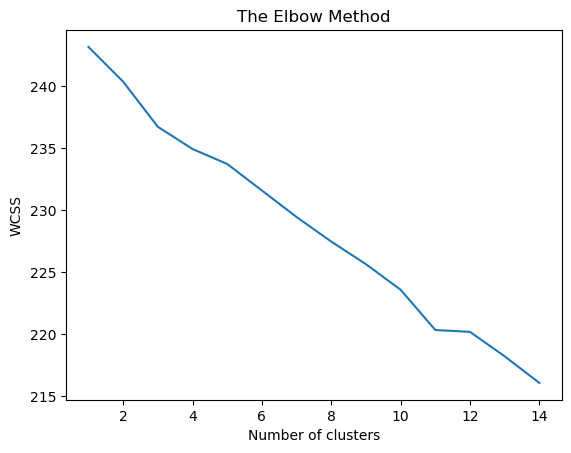

In [118]:
# Определяем кол-во кластеров для метода K-means
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
kmeans = KMeans(init='k-means++', n_clusters=11, n_init=28, random_state=42)
kmeans.fit(X)
pred=kmeans.fit_predict(X)

In [120]:
import pickle

model = kmeans

with open('3df_km.pkl', 'wb') as file:
    pickle.dump(model, file)

In [121]:
df['Кластер'] = pd.Series(pred)

In [122]:
df

Название  Год выпуска Длительность  \
0         Побег из Шоушенка         1994       2h 22m   
1             Крёстный отец         1972       2h 55m   
2             Тёмный рыцарь         2008       2h 32m   
3           Крёстный отец 2         1974       3h 22m   
4    12 рaзгневанных мужчин         1957       1h 36m   
..                      ...          ...          ...   
245            Форма голоса         2016       2h 10m   
246                Прислуга         2011       2h 26m   
247             Сука любовь         2000       2h 34m   
248                 Ребекка         1940       2h 10m   
249               Видимость         2015       2h 43m   

                                      Описание_перевод  Рейтинг  \
0    Банкир, осужденный за уксорицид, образует друж...      9.3   
1    Старение патриарха организованной криминальной...      9.2   
2    Когда угроза, известная как Джокер, наносит ущ...      9.0   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4    Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
..                                                 ...      ...   
245  Глухая девушка, Шоко, издевается популярной Ша...      8.1   
246  Начинающий автор во время движения за гражданс...      8.1   
247  Любительский боец ​​собаки, супермодель и забр...      8.0   
248  Самосознательная женщина жонглирует приспособл...      8.1   
249  Отчаянные меры принимаются человеком, который ...      8.2   

                            Страна                     Жанр  \
0                    United States                    Drama   
1                    United States             Crime, Drama   
2    United States, United Kingdom     Action, Crime, Drama   
3                    United States             Crime, Drama   
4                    United States             Crime, Drama   
..                             ...                      ...   
245                          Japan         Animation, Drama   
246           United States, India                    Drama   
247                         Mexico          Drama, Thriller   
248                  United States  Drama, Mystery, Romance   
249                          India    Crime, Drama, Mystery   

                                    Обработанный текст  \
0    банкир, осужденный за уксорицид, образует друж...   
1    старение патриарха организованной криминальной...   
2    когда угроза, известная как джокер, наносит ущ...   
3    ранняя жизнь и карьера вито корлеоне в 1920 -х...   
4    присяжные в суде по делу об убийстве в нью -йо...   
..                                                 ...   
245  глухая девушка, шоко, издевается популярной ша...   
246  начинающий автор во время движения за гражданс...   
247  любительский боец ​​собаки, супермодель и забр...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком, который ...   

                                Токенизированный текст  \
0    банкир , осужденный уксорицид , образует дружб...   
1    старение патриарха организованной криминальной...   
2    угроза , известная джокер , наносит ущерб хаос...   
3    ранняя жизнь карьера вито корлеоне 1920 -х год...   
4    присяжные суде делу убийстве нью -йорке разоча...   
..                                                 ...   
245  глухая девушка , шоко , издевается популярной ...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки , супермодель забро...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком , пытаетс...   

                                Лематизированный текст  \
0    банкир , осудить уксорицид , образовать дружба...   
1    старение патриарх организовать криминальный ди...   
2    угроза , известный джокер , наносить ущерб хао...   
3    ранний жизнь карьера вить корлеон 1920 -х год ...   
4    присяжный суд дело убийство нью -йорк разочаро...   
..                            

In [123]:
df['Кластер'].value_counts()

Кластер
7     49
8     30
0     26
3     23
6     23
1     21
4     19
2     18
10    17
5     12
9     12
Name: count, dtype: int64

In [124]:
def get_cloudwords_by_claster(claster):
    claster_df = df[df['Кластер'] == claster]
    corpus = get_corpus(claster_df['Лематизированный текст'].values)
    return WordCloud(background_color='white',
                          stopwords=STOPWORDS,
                          width=2500,
                          height=2000,
                          max_words=400,
                          random_state=42
                         ).generate(str_corpus(corpus))

			1 кластер


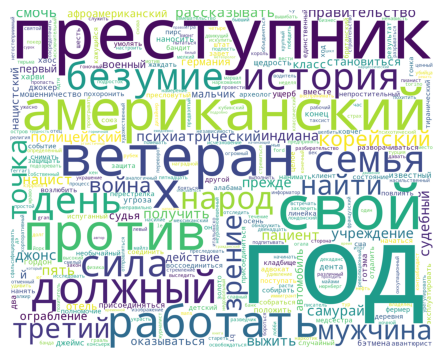

			2 кластер


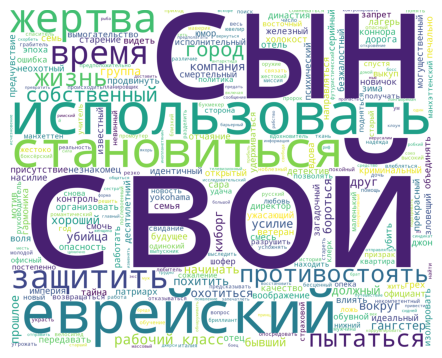

			3 кластер


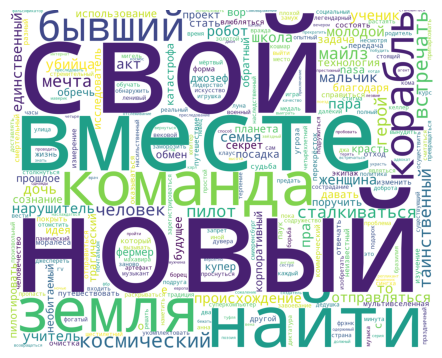

			4 кластер


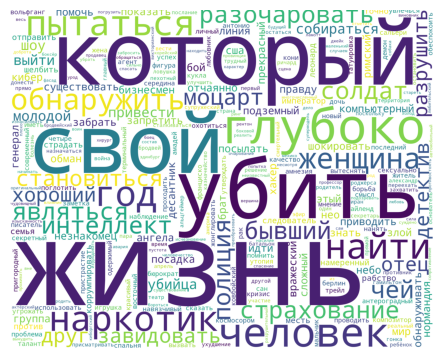

			5 кластер


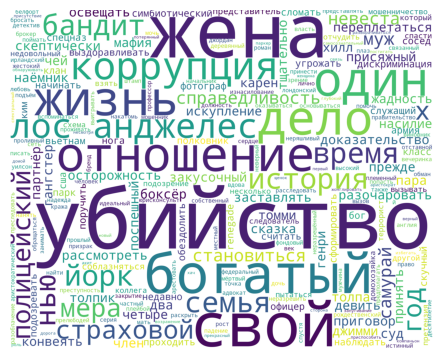

			6 кластер


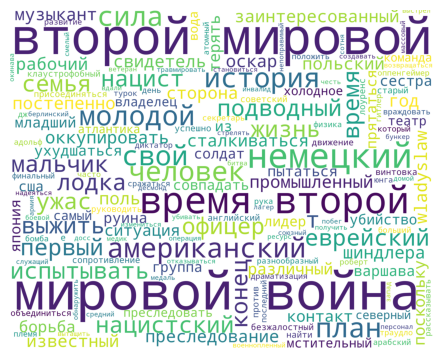

			7 кластер


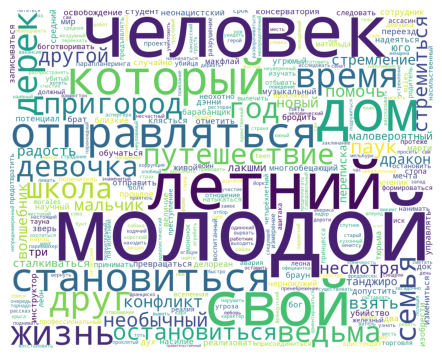

			8 кластер


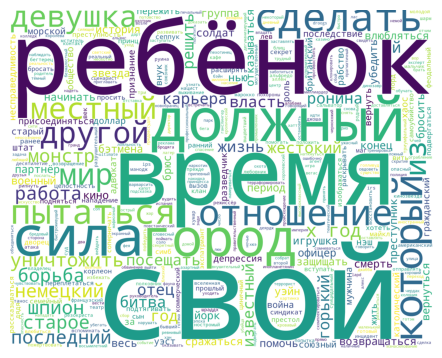

			9 кластер


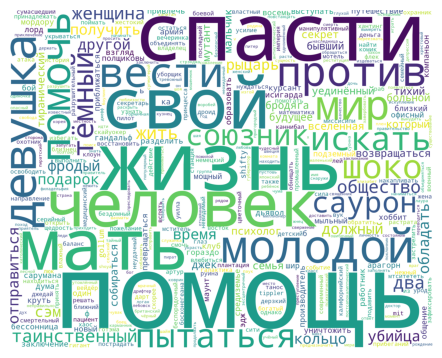

			10 кластер


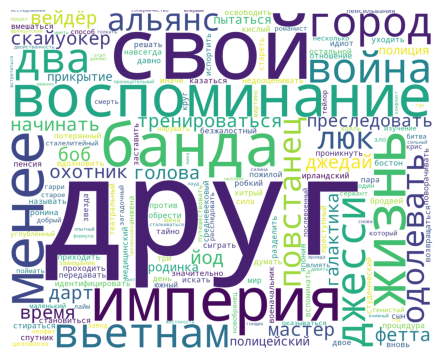

			11 кластер


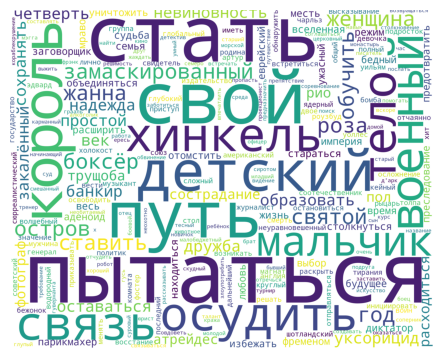

In [125]:
for i in range(df["Кластер"].nunique()):
    print(f"\t\t\t{i+1} кластер")
    cloud = get_cloudwords_by_claster(i)
    fig = plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [156]:
# Даем название
names = {0: "антологию в жанре психологического триллера, криминальной драмы и приключенческого экшна", 
         1: "кризисом идентичности, социальной несправедливостью и борьбой за выживание", 
         2: "столкновение с неожиданными последствиями своих действий в путешествие", 
         3: "мотив разочарования, Герои сталкиваются с крахом иллюзий из-за наркотиков, одержимость над фальшивой реальности и войны.", 
         4: "Криминальные драмы: убийства, коррупция и борьба за справедливость в разных эпохах", 
         5: "Вторая мировая война и её последствия: борьба, жертвы и судьбы семей", 
         6: "Испытания и трансформация, Поиск счастья и любви, Работа над мечтой", 
         7:"Тени прошлого: преступность, рабство и борьба за выживание", 
         8:"борьбы между светом и тьмой, Испытания веры", 
         9:"Испытания дружбы, Разные миры, одни проблемы: конфликты, память и война", 
         10:"Испытания судьбы: от детских мечтаний до исторических битв за правду, преодолением трудностей и надеждой выбором пути "}
def give_cluster_name():
    df["Категория кластера"] = df['Кластер'].map(names)
give_cluster_name()

In [157]:
df

Название  Год выпуска Длительность  \
0         Побег из Шоушенка         1994       2h 22m   
1             Крёстный отец         1972       2h 55m   
2             Тёмный рыцарь         2008       2h 32m   
3           Крёстный отец 2         1974       3h 22m   
4    12 рaзгневанных мужчин         1957       1h 36m   
..                      ...          ...          ...   
245            Форма голоса         2016       2h 10m   
246                Прислуга         2011       2h 26m   
247             Сука любовь         2000       2h 34m   
248                 Ребекка         1940       2h 10m   
249               Видимость         2015       2h 43m   

                                      Описание_перевод  Рейтинг  \
0    Банкир, осужденный за уксорицид, образует друж...      9.3   
1    Старение патриарха организованной криминальной...      9.2   
2    Когда угроза, известная как Джокер, наносит ущ...      9.0   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...      9.0   
4    Присяжные в суде по делу об убийстве в Нью -Йо...      9.0   
..                                                 ...      ...   
245  Глухая девушка, Шоко, издевается популярной Ша...      8.1   
246  Начинающий автор во время движения за гражданс...      8.1   
247  Любительский боец ​​собаки, супермодель и забр...      8.0   
248  Самосознательная женщина жонглирует приспособл...      8.1   
249  Отчаянные меры принимаются человеком, который ...      8.2   

                            Страна                     Жанр  \
0                    United States                    Drama   
1                    United States             Crime, Drama   
2    United States, United Kingdom     Action, Crime, Drama   
3                    United States             Crime, Drama   
4                    United States             Crime, Drama   
..                             ...                      ...   
245                          Japan         Animation, Drama   
246           United States, India                    Drama   
247                         Mexico          Drama, Thriller   
248                  United States  Drama, Mystery, Romance   
249                          India    Crime, Drama, Mystery   

                                    Обработанный текст  \
0    банкир, осужденный за уксорицид, образует друж...   
1    старение патриарха организованной криминальной...   
2    когда угроза, известная как джокер, наносит ущ...   
3    ранняя жизнь и карьера вито корлеоне в 1920 -х...   
4    присяжные в суде по делу об убийстве в нью -йо...   
..                                                 ...   
245  глухая девушка, шоко, издевается популярной ша...   
246  начинающий автор во время движения за гражданс...   
247  любительский боец ​​собаки, супермодель и забр...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком, который ...   

                                Токенизированный текст  \
0    банкир , осужденный уксорицид , образует дружб...   
1    старение патриарха организованной криминальной...   
2    угроза , известная джокер , наносит ущерб хаос...   
3    ранняя жизнь карьера вито корлеоне 1920 -х год...   
4    присяжные суде делу убийстве нью -йорке разоча...   
..                                                 ...   
245  глухая девушка , шоко , издевается популярной ...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки , супермодель забро...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком , пытаетс...   

                                Лематизированный текст  \
0    банкир , осудить уксорицид , образовать дружба...   
1    старение патриарх организовать криминальный ди...   
2    угроза , известный джокер , наносить ущерб хао...   
3    ранний жизнь карьера вить корлеон 1920 -х год ...   
4    присяжный суд дело убийство нью -йорк разочаро...   
..                            

## Тематическое моделирование

In [158]:
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim

In [159]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                             min_df=0.01, stop_words=russian_stopwords,
                             ngram_range=(1,3))

In [160]:
def print_themes_and_titles(df):
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])
        lsa_model = TruncatedSVD(n_components=5, random_state=0)
        lsa_model.fit(tfidf_matrix)
        # вывод топ слов для каждой темы
        for i, topic in enumerate(lsa_model.components_):
            print(f"Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-50:-1]])}")
    except ValueError as e:
        print(f"Ошибка: {e}")


In [161]:
df0 = df[df['Кластер']==0]
df1 = df[df['Кластер']==1]
df2 = df[df['Кластер']==2]
df3 = df[df['Кластер']==3]
df4 = df[df['Кластер']==4]
df5 = df[df['Кластер']==5]
df6 = df[df['Кластер']==6]
df7 = df[df['Кластер']==7]
df8 = df[df['Кластер']==8]
df9 = df[df['Кластер']==9]
df10 = df[df['Кластер']==10]

In [162]:
print_themes_and_titles(df0)

Тема 0: год, преступник, американский, безумие, против, война, корейский война, ветеран корейский война, корейский, ветеран корейский, семья, психиатрический учреждение, учреждение, пациент, психиатрический, история, сила, ветеран, 1950 год, 1950, нацист, джонс, индиана джонс, индиана, получить, военный, правительство, 1980, 1980 год, зрение, точка зрение, точка, нацистский, германия, судья, мальчик, день, работать, народ, умолять безумие поступать, умолять безумие, умолять, учреждение снимать, против тиранический, медсестра, преступник умолять, преступник умолять безумие, безумие поступать, безумие поступать психиатрический
Тема 1: учреждение, пациент, психиатрический учреждение, психиатрический, ветеран, преступник, ветеран корейский, корейский война, корейский, война, ветеран корейский война, безумие, умолять безумие поступать, 1963 год, безумие поступать психиатрический, безумие поступать, корейский война преступник, поступать, поступать психиатрический, учреждение снимать испуганн

In [163]:
print_themes_and_titles(df1)

Тема 0: сын, становиться, рабочий класс, класс, рабочий, жертва, город, похитить, становиться жертва, время, еврейский, защитить, использовать, жизнь, вокруг, компания, усилие, италия похитить велосипед, похитить велосипед, рабочий класс угрожать, велосипед рабочий класс, похитить велосипед рабочий, италия похитить, усилие поиск работа, класс угрожать, усилие поиск, угрожать, велосипед рабочий, италия, велосипед, решить найти, сын решить, сын решить найти, угрожать усилие поиск, угрожать усилие, класс угрожать усилие, решить, работа, найти, послевоенный италия похитить, послевоенный италия, послевоенный, поиск работа сын, поиск работа, поиск, работа сын решить, работа сын, смесь воля, опасность вокруг лагерь
Тема 1: город, рабочий, класс, рабочий класс, усилие, спаситель опосредовать, рабочий класс предсказывать, спаситель, приход, опосредовать различие, спаситель опосредовать различие, разделить, разделить рабочий, разделить рабочий класс, различие, резко, рабочий класс планировщик, о

In [164]:
print_themes_and_titles(df2)

Тема 0: корабль, найти, космический, космический корабль, новый, человек, таинственный, происхождение, земля, отправляться, команда, космический корабль укомплектовать, таинственный артефакт космический, раскрываться, раскрываться таинственный, раскрываться таинственный артефакт, артефакт космический, артефакт, луна, артефакт космический корабль, луна раскрываться таинственный, корабль укомплектовать человек, корабль укомплектовать, укомплектовать человек суперкомпьютер, укомплектовать человек, укомплектовать, суперкомпьютер, суперкомпьютер отправляться, суперкомпьютер отправляться юпитер, луна раскрываться, таинственный артефакт, человек суперкомпьютер отправляться, найти происхождение, юпитер найти происхождение, юпитер найти, юпитер, отправляться юпитер, отправляться юпитер найти, человек суперкомпьютер, бывший, встречать, вместе, пара, майлз, герой, nasa, корабль вместе команда, стать необитаемый, стать необитаемый фермер
Тема 1: новый, пара, нарушитель, майлз, герой, ученик, мальч

In [165]:
print_themes_and_titles(df3)

Тема 0: жизнь, пытаться, найти, обнаружить, пытаться найти, убить, наркотик, женщина, смысл жизнь, рак, обнаружить терминальный, жизнь обнаружить, жизнь обнаружить терминальный, смысл жизнь обнаружить, найти смысл, смысл, терминальный рак, терминальный, бюрократ пытаться, бюрократ пытаться найти, обнаружить терминальный рак, пытаться найти смысл, найти смысл жизнь, бюрократ, глубоко, молодой женщина, молодой, детектив, год, убийца, друг, разочаровать, привести, человек, полиция, становиться, страхование, являться, шоу, 1986, 1986 год детектив, убить неизвестный, обнаружить изнасиловать, корейский, корейский провинция, случаем многочисленный, случаем, корейский провинция 1986, неизвестный виновник
Тема 1: наркотик, глубоко, друг, разрушить, хороший, кони, житель кони айленд, четыре, проходить, проходить глубоко, разрушить пристрастие, разрушить пристрастие проходить, вызвать, житель, житель кони, четыре житель кони, утопия вызвать наркотик, утопия вызвать, утопия, кони айленд, наркотик 

In [166]:
print_themes_and_titles(df4)

Тема 0: анджелес, лос, лос анджелес, убийство, год лос, год лос анджелес, год, коррупция, полицейский, жена, мера, справедливость, 1950 год лос, мера рост, расследовать, 1950, лос анджелес полицейский, расследовать серия убийство, расследовать серия, убийство собственный, рост коррупция, убийство собственный бренд, мера рост коррупция, 1950 год, рост, коррупция 1950, рост коррупция 1950, коррупция 1950 год, проливный, серия, серия убийство, серия убийство собственный, жестокий неряшливый расследовать, жестокий неряшливый, жестокий, собственный, собственный бренд, собственный бренд справедливость, проливный жестокий, проливный жестокий неряшливый, неряшливый расследовать, бренд справедливость, бренд, анджелес полицейский, анджелес полицейский проливный, полицейский проливный жестокий, неряшливый, полицейский проливный, неряшливый расследовать серия
Тема 1: жена, богатый, жизнь, отношение, идеальный убийство, плейбой представлять идеальный, плейбой представлять, плейбой, лондонский, неве

In [167]:
print_themes_and_titles(df5)

Тема 0: время второй мировой, время второй, время, сила, немецкий, план, молодой, мальчик, молодой мальчик, выжить, младший сестра сила, мальчик младший сестра, младший, младший сестра, молодой мальчик младший, сила пытаться выжить, япония время, пытаться, пытаться выжить, пытаться выжить япония, сестра, сестра сила, сестра сила пытаться, мальчик младший, япония время второй, сила пытаться, япония, выжить япония, выжить япония время, нацист, еврейский, испытывать ужас, ужас, испытывать, человек, владелец театр самый, сша совпадать мстительный, сша совпадать, сша, мстительный план, мстительный план владелец, совпадать, совпадать мстительный, нацистский лидер, нацистский лидер группа, совпадать мстительный план, самый, владелец театр, владелец
Тема 1: молодой, лодка, подводный, подводный лодка, испытывать ужас, ужас, испытывать, мальчик, молодой мальчик, найти, найти старый винтовка, найти старый, немецкий сила испытывать, молодой мальчик присоединяться, старый винтовка молодой, мальчик 

In [168]:
print_themes_and_titles(df6)

Тема 0: молодой, человек, летний, молодой человек, становиться, пригород, время, жизнь, дракон, дом, друг, проект попечитель, четырёхлетний авария, аристократ нанимать молодой, попечитель, человек проект попечитель, аристократ нанимать, человек проект, становиться четырёхлетний авария, проект, становиться четырёхлетний, четырёхлетний авария парапланеринга, молодой человек проект, аристократ, парапланеринга аристократ нанимать, нанимать, нанимать молодой, нанимать молодой человек, парапланеринга, парапланеринга аристократ, четырёхлетний, авария парапланеринга аристократ, авария парапланеринга, авария, 24 час, пригород следующий, пригород следующий день, час, молодой человек французский, час жизнь, жестокий бунт, французский пригород следующий, французский пригород, французский, день, жестокий, следующий день жестокий, жизнь молодой человек, день жестокий бунт
Тема 1: летний, 44 летний, переписка, 44, 12 летний, 12, девочка, летний девочка, предъявлять иск родитель, летний мальчик предъя

In [169]:
print_themes_and_titles(df7)

Тема 0: ребёнок, город, отношение, время, монстр, немецкий, год, сделать, преступник, пытаться, 1920, 1920 год, девушка, присоединяться, партнёр, поймать убийца, убийца ребёнок преступник, немецкий город, убийца ребёнок, убийца, город поймать убийца, немецкий город поймать, город поймать, поймать, присоединяться охота, поймать убийца ребёнок, полиция, полиция немецкий, охота, преступник присоединяться, преступник присоединяться охота, ребёнок преступник, ребёнок преступник присоединяться, полиция немецкий город, уэст, внук, работа, разведчик, общество, несправедливость, подвергать, подвергать отношение, ребёнок событие подвергать, бросить ребёнок событие, заботиться бросить ребёнок, бросить ребёнок, заботиться бросить, заботиться, бродяга
Тема 1: год, время, 1920, 1920 год, сделать, девушка, разведчик, отношение, убедить, игрушка, власть, карьера, 1920 год изображаться, расширять подтягивать, преступность, майкл, сын майкл, расширять подтягивать власть, сын, сын майкл расширять, ранний

In [170]:
print_themes_and_titles(df8)

Тема 0: помощь, спасти, жизнь, молодой, пытаться, мать, девушка, вести, таинственный, мир, искать, общество, женщина, жить, обладать, семья, человек, тёмный, помощь молодой, тихий, вести тихий, искать помощь, спасти жизнь, мать искать, католический священник спасти, девушка мать искать, таинственный сущность, молодой девушка мать, искать помощь католический, таинственный сущность обладать, помощь католический, мать искать помощь, священник спасти жизнь, католический священник, католический, сущность обладать молодой, сущность обладать, молодой девушка, сущность, обладать молодой, обладать молодой девушка, девушка мать, священник, священник спасти, помощь католический священник, бродяга, против, саурон, пытаться спасти
Тема 1: саурон, против, фродый, фродый сэм, сэм, вести, спасти, человек, кольцо, мир, сэм приближаться маунт, сэм приближаться, мир человек, мир человек против, человек против, приближаться, приближаться маунт, маунт дума кольцо, маунт дума, человек против армия, гандальф

In [171]:
print_themes_and_titles(df9)

Тема 0: друг друг, менее, джесси, банда, воспоминание, отношение становиться, становиться кислый, кислый, стираться друг друг, стираться друг, стираться, отношение, процедура навсегда, отношение становиться кислый, становиться кислый пара, пара проходить, становиться, пара, навсегда стираться, пара проходить медицинский, проходить, проходить медицинский, друг воспоминание, проходить медицинский процедура, процедура, друг друг воспоминание, навсегда стираться друг, процедура навсегда стираться, кислый пара проходить, навсегда, кислый пара, медицинский процедура навсегда, медицинский процедура, медицинский, банда южный бостон, банда южный, родинка полиция пытаться, прикрытие родинка полиция, прикрытие родинка, родинка, родинка полиция, полиция пытаться идентифицировать, полиция пытаться, полиция, прикрытие, бостон, полицейский прикрытие родинка, полицейский прикрытие, друг проникнуть
Тема 1: вьетнам, война, жизнь, маленький сталелитейный завод, изучение способ, пенсильвания, нарушать жиз

In [172]:
print_themes_and_titles(df10)

Тема 0: стать, детский, пытаться, мальчик, тело, король, путь, трущоба рио, фотограф, путь расходиться пытаться, детский путь, путь расходиться, детский путь расходиться, рио детский путь, рио детский, рио, трущоба рио детский, трущоба, расходиться, пытаться стать, пытаться стать фотограф, стать фотограф, стать фотограф король, расходиться пытаться стать, фотограф король, расходиться пытаться, связь, тело пропасть мальчик, путешествие друг найти, писатель рассказывать детский, писатель рассказывать, путешествие друг, писатель, пропасть мальчик, найти тело пропасть, пропасть, тело пропасть, путешествие, рассказывать детский, детский путешествие друг, друг найти, друг, рассказывать детский путешествие, найти, найти тело, рассказывать, друг найти тело, детский путешествие, волшебный
Тема 1: пытаться, осудить, жанна, король, святой, хинкель, дружба четверть, простой сострадание, образовать дружба, банкир, банкир осудить, банкир осудить уксорицид, образовать дружба четверть, оставаться, ост

In [173]:
names = {}
def give_cluster_name():
    df["Категория кластера моделирование"] = df['Кластер'].map(names)
give_cluster_name()

### Сохранеине дата сета

In [174]:
df.to_csv("3Films_Themes.csv", index=False, encoding='utf-8-sig')

# Классификация

In [175]:
X_text = tfidf_vectorizer.fit_transform(df['Лематизированный текст'])

In [185]:
from sklearn.model_selection import train_test_split
y = df['Кластер']
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=50)

# RandomForestClassifier

In [186]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

RandomForestClassifier()

In [187]:
y_pred = randomfc.predict(X_test)

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       1.00      0.43      0.60         7
           2       0.67      0.50      0.57         4
           3       0.71      0.56      0.62         9
           4       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       0.83      0.62      0.71         8
           7       0.32      0.92      0.48        13
           8       1.00      0.17      0.29        12
           9       1.00      0.67      0.80         3
          10       0.67      0.50      0.57         4

    accuracy                           0.57        75
   macro avg       0.81      0.58      0.63        75
weighted avg       0.76      0.57      0.58        75



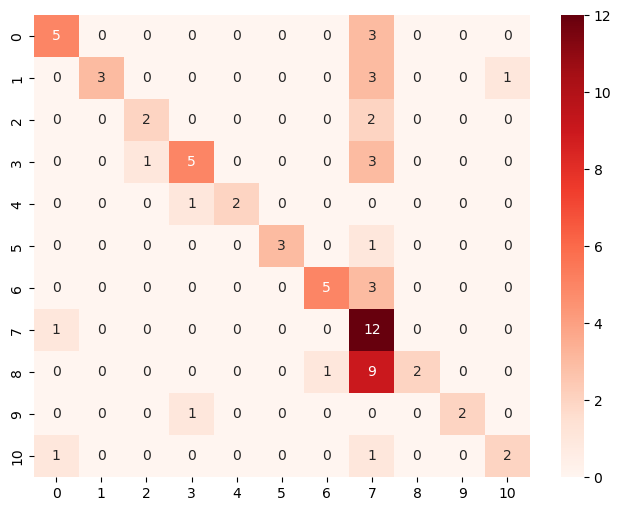

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

In [190]:
with open('3modelFilmsII.pkl', 'wb') as file:
    pickle.dump(randomfc, file)

# LogisticRegression

In [191]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [192]:
    y_pred = lr.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       1.00      0.14      0.25         7
           2       1.00      0.50      0.67         4
           3       1.00      0.11      0.20         9
           4       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      0.38      0.55         8
           7       0.21      1.00      0.35        13
           8       1.00      0.08      0.15        12
           9       1.00      0.33      0.50         3
          10       1.00      0.25      0.40         4

    accuracy                           0.35        75
   macro avg       0.93      0.33      0.38        75
weighted avg       0.86      0.35      0.32        75



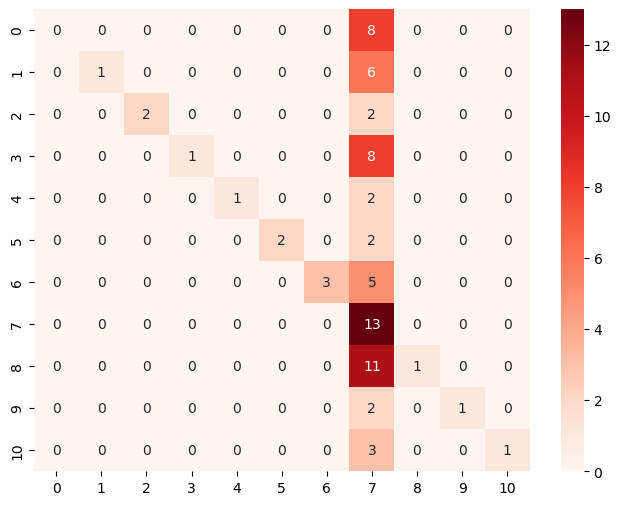

In [193]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()